<h1>Climate Risk and Economic Losses<h1>

In [1]:
#importing needed libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv("climate-risk-index-1.csv")
df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


<h4>Below the description of the columns<h4>

In [3]:
#checking data types and total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

<h1>Data Wrangling<h1>

<AxesSubplot:>

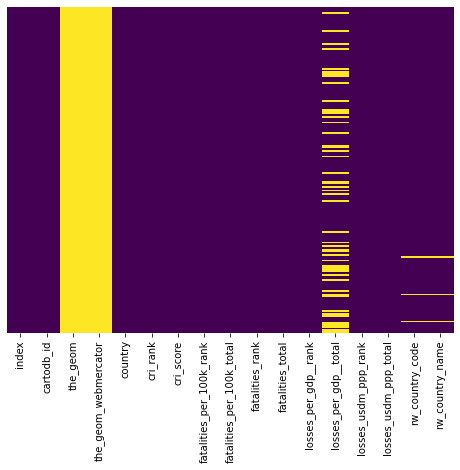

In [4]:
#visualizing missing data
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [5]:
#Dropping columns with excessive missing data
df.drop(['the_geom', 'the_geom_webmercator'], axis = 1, inplace = True)
df.head()

,index,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [8]:
#checking for duplicate values
df_dup = df.duplicated().sum()
print(f"there are {df_dup} duplicate values")

there are 0 duplicate values


In [10]:
#check columns
print(df.columns)

Index(['index', 'cartodb_id', 'country', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')


In [11]:
#droping index column
df.drop('index', axis =1, inplace = True)
df.head(2)

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,1,Saudi Arabia,79,72.5,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,Romania,61,61.5,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania


<AxesSubplot:>

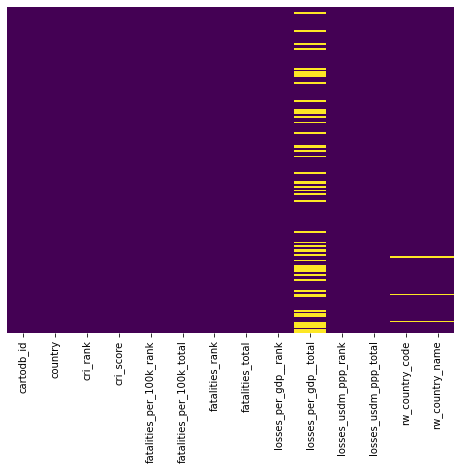

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [16]:
missing_data =df.isnull()
missing_data.head()

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#finding the total number of missing values per column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

cartodb_id
False    182
Name: cartodb_id, dtype: int64

country
False    182
Name: country, dtype: int64

cri_rank
False    182
Name: cri_rank, dtype: int64

cri_score
False    182
Name: cri_score, dtype: int64

fatalities_per_100k_rank
False    182
Name: fatalities_per_100k_rank, dtype: int64

fatalities_per_100k_total
False    182
Name: fatalities_per_100k_total, dtype: int64

fatalities_rank
False    182
Name: fatalities_rank, dtype: int64

fatalities_total
False    182
Name: fatalities_total, dtype: int64

losses_per_gdp__rank
False    182
Name: losses_per_gdp__rank, dtype: int64

losses_per_gdp__total
False    131
True      51
Name: losses_per_gdp__total, dtype: int64

losses_usdm_ppp_rank
False    182
Name: losses_usdm_ppp_rank, dtype: int64

losses_usdm_ppp_total
False    182
Name: losses_usdm_ppp_total, dtype: int64

rw_country_code
False    179
True       3
Name: rw_country_code, dtype: int64

rw_country_name
False    179
True       3
Name: rw_country_name, dtype: int64

